In [27]:
!cd ~/Desktop/
#!pwd

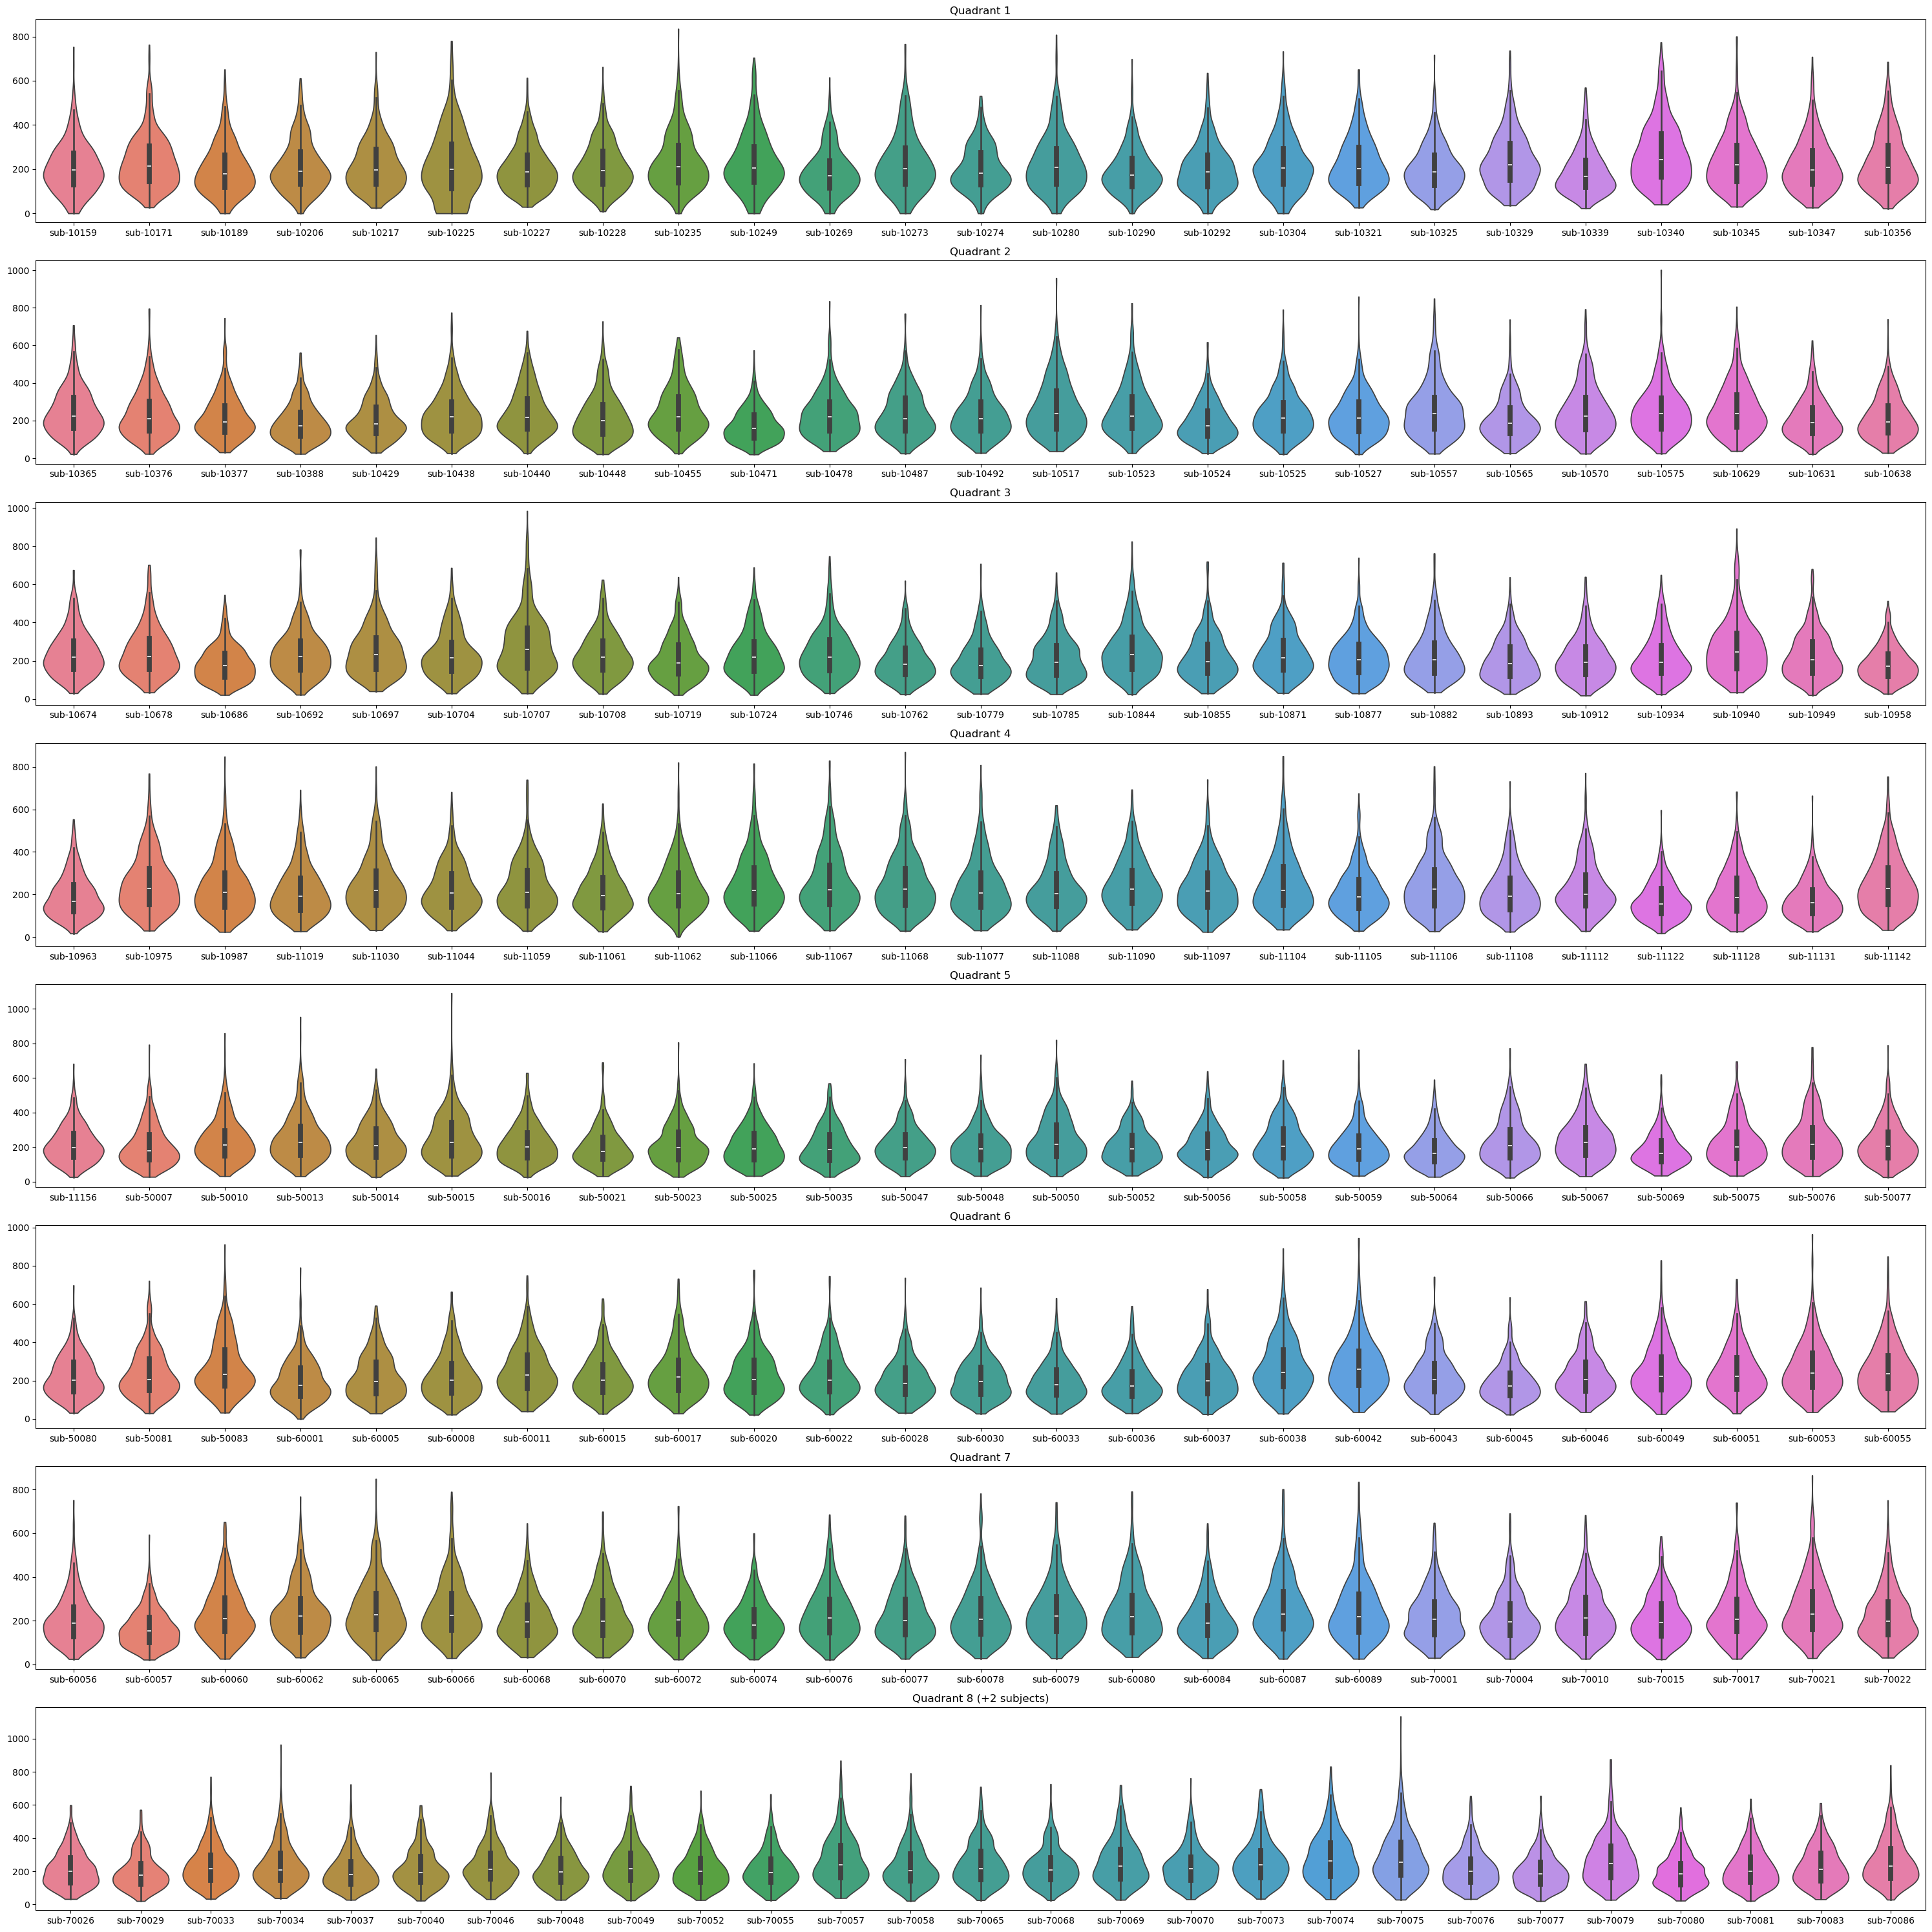

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabridele/Desktop/storage_folder/spreading_dynamics_clinical/derivatives/concat_vols.tsv", sep='\t')
vols = vols.set_index('Parcels')
vols = vols.reindex(sorted(vols.columns), axis=1)

# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(30, 30))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots} (+{subjects_remaining} subjects)')

# Adjust layout
plt.tight_layout()
plt.show()


In [3]:
!pwd

/Users/gabrieledele/Desktop/GitHub/thesis-work


In [16]:
import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv("/home/gabridele/Desktop/storage_folder/spreading_dynamics_clinical/derivatives/concat_vols.tsv", sep='\t', index_col=0)

# Transpose the DataFrame to have subjects as rows and parcels as columns
df_transposed = df.transpose()

# Check for 0 entries
zero_entries = df_transposed[df_transposed == 0].stack().reset_index()
zero_entries.columns = ['Subject Name', 'Parcel Index', 'Value']

print("Subjects with 0 entries:")
print(zero_entries)
zero_entries.to_csv('/home/gabridele/Desktop/storage_folder/spreading_dynamics_clinical/derivatives/zero_entries.tsv', sep='\t', index=False)

Subjects with 0 entries:
    Subject Name  Parcel Index  Value
0      sub-10235           173    0.0
1      sub-10235           380    0.0
2      sub-10292            60    0.0
3      sub-10292            63    0.0
4      sub-10292            66    0.0
..           ...           ...    ...
105    sub-10274           257    0.0
106    sub-10274           258    0.0
107    sub-10274           262    0.0
108    sub-10274           264    0.0
109    sub-10274           380    0.0

[110 rows x 3 columns]
